In [11]:
pip install "qiskit>=1.0"

Note: you may need to restart the kernel to use updated packages.


In [12]:
from GSS_tools_IRB_X180 import *
import xarray as xr
import numpy as np
from helpers import *

In [13]:
# Total number of sequences generated:

# Sequence length:
m_list= [1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [14]:
# Load datasets 
ds_stat = xr.load_dataset("/Users/PARKJIHYEON/phys763/qolab-start/data/2025-12-14/#m1000_k1000/ds_stat.h5")
ds_seq  = xr.load_dataset("/Users/PARKJIHYEON/phys763/qolab-start/data/2025-12-14/#m1000_k1000/ds_seq.h5")

In [15]:
# Convert datasets
da = ds_stat["state_raw_q"]
a = da.sel(qubit="q4").values        # shape (num_sequences, num_depths)
S_tot = np.shape(a)[0]

a_T = a.T
print(np.shape(a_T))
da2 = ds_seq["sequence_q"]
b = da2.sel(qubit="q4").values        # shape (num_sequences, num_depths)

(11, 1000)


In [16]:
# Case 3 : Real circuit
results_bit_real = a_T
results_seq_real = b_to_depth_seq_dicts_unitaries(b, m_list, U_clifford)

100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 1234708.27it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 70244.58it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 44801.37it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 31131.41it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 18221.21it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 15113.03it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 12559.04it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 11353.48it/s]

100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 17.72it/s]


In [17]:
print(results_bit_real[0])

[0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 

In [18]:
### Estimator built directly from the mean sample:

## Case 3: real
k_list_real = []
for i,m in enumerate(m_list):
    k = k_estimator_mean(results_seq_real[i],results_bit_real[i],S_tot)
    k_list_real.append(k)

k_real_mean = np.array(k_list_real).real
k_real_mean_norm = np.array(k_list_real).real/np.array(k_list_real).real[0]

# Estimator built from the median-of-means:
k_list_real_mom = []
for i,m in enumerate(m_list):
    k = np.median(k_estimator_mom(results_seq_real[i],results_bit_real[i],S_tot,1000))
    k_list_real_mom.append(k)

k_real_mom = np.array(k_list_real_mom).real
k_real_mom_norm = np.array(k_list_real_mom).real/np.array(k_list_real_mom).real[0]

A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 16071.24it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 170.36it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:11<00:00, 85.48it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:17<00:00, 57.31it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:23<00:00, 42.83it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:29<00:00, 34.16it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:35<00:00, 28.50it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:40<00:00, 24.43it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:47<00:00, 21.27it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|███████████████████████████████████████| 1000/1000 [00:52<00:00, 19.01it/s]


A_X: [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


100%|█████████████████████████████████████████████| 1/1 [00:57<00:00, 57.46s/it]


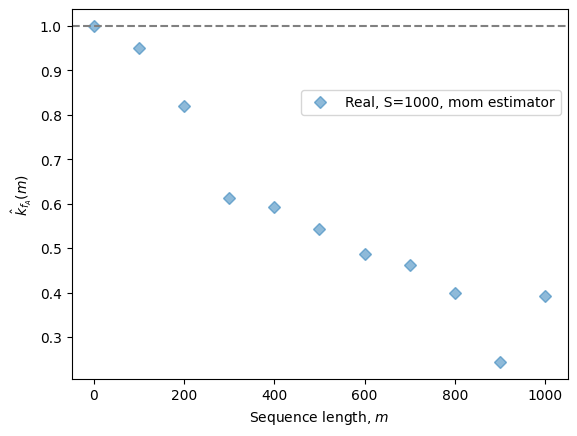

In [26]:
import numpy as np
# Ploting the sequence estimators for 1000 samples:

#plt.plot(m_list,np.array(k_noiseless_mean_norm).real,'.',label=f'Noiseless, S={S_tot}, mean estimator')
#plt.plot(m_list,np.array(k_noiseless_mom_norm).real,'p',label=f'Noiseless, S={S_tot}, mom estimator',alpha=0.5)


plt.plot(m_list,np.array(k_real_mom_norm).real,'D',label=f'Real, S={S_tot}, mom estimator',alpha=0.5)
plt.axhline(1.0,ls='--',c='grey')
#plt.ylim([0,1])
plt.xlabel('Sequence length, $m$')
plt.ylabel(r'$\hat{k}_{f_A}(m)$')
plt.legend(bbox_to_anchor=(1.0,0.8));

In [27]:
print(np.array(k_real_mean))

[ 1.00500000e-01 -1.25000000e-02 -1.50000000e-03 -3.05000000e-02
 -1.25000000e-02  7.50000000e-03 -3.00000000e-03  1.50000000e-03
  4.37652906e-17  1.05000000e-02 -1.25000000e-02]


log-fit estimates: c0=0.988955, p=0.998815


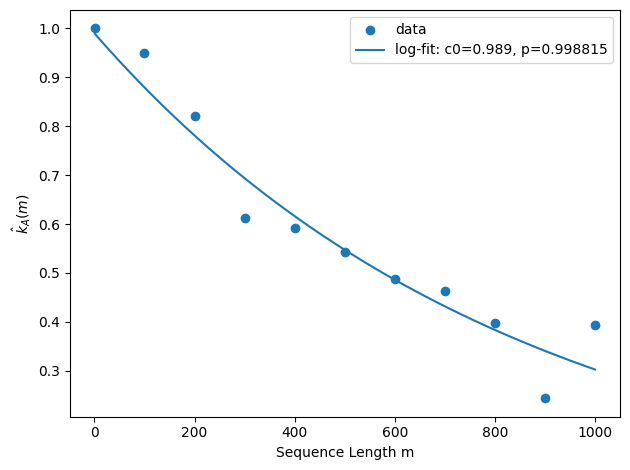

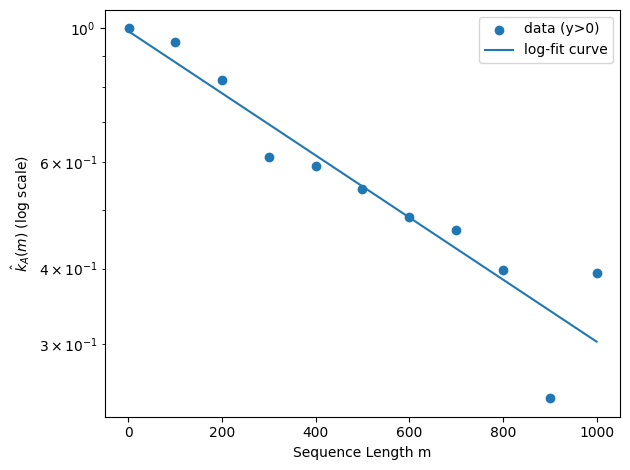

In [31]:
import numpy as np
import matplotlib.pyplot as plt

m_data= np.array(m_list)
# --- model ---
def model_fit(m, c0, p):
    return c0 * (p ** (m - 1.0))

# --- your data ---
m_data = np.array(m_data, dtype=float)      # x-axis
y_data = np.array(k_real_mom_norm, dtype=float)  # y-axis

# 1) mask: log 가능한 점만 사용
mask = y_data > 0
m_fit = m_data[mask]
y_fit = y_data[mask]

# 2) log-linear regression: log y = log c0 + (m-1) log p
x = (m_fit - 1.0)
logy = np.log(y_fit)

# 선형회귀: logy = a + b*x  (a=log c0, b=log p)
b, a = np.polyfit(x, logy, 1)
p_hat  = np.exp(b)
c0_hat = np.exp(a)

print(f"log-fit estimates: c0={c0_hat:.6g}, p={p_hat:.6g}")

# 3) fitted curve for plotting (전체 m 구간)
m_grid = np.linspace(m_data.min(), m_data.max(), 400)
y_pred = model_fit(m_grid, c0_hat, p_hat)

# --- Plot 1: linear y-scale ---
plt.figure()
plt.scatter(m_data, y_data, label="data")
plt.plot(m_grid, y_pred, label=f"log-fit: c0={c0_hat:.3g}, p={p_hat:.6f}")
plt.xlabel("Sequence Length m")
plt.ylabel(r"$\hat{k}_A(m)$")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: semi-log (y axis log) ---
plt.figure()
plt.scatter(m_fit, y_fit, label="data (y>0)")
plt.plot(m_grid, y_pred, label="log-fit curve")
plt.yscale("log")
plt.xlabel("Sequence Length m")
plt.ylabel(r"$\hat{k}_A(m)$ (log scale)")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
print("x axis\n")
print(m_list)
print("y data")
print(np.array(y_data))

x axis

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y data
[1.         0.95024876 0.82089552 0.6119403  0.5920398  0.54228856
 0.48756219 0.46268657 0.39800995 0.24378109 0.39303483]


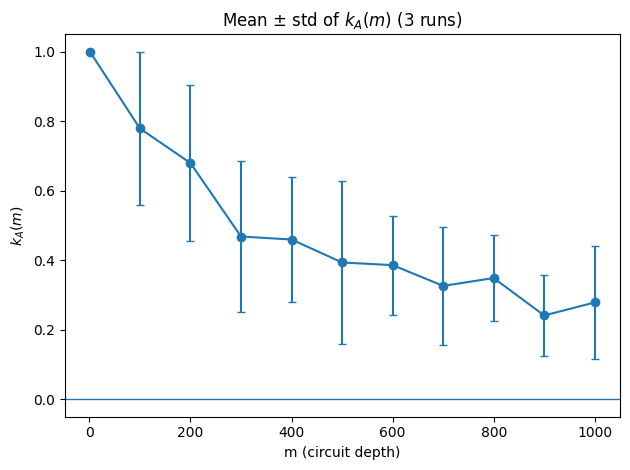

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# Data (3 repeats)
# ------------------------
m = np.array([1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], dtype=float)

y1 = np.array([1.        , 0.53159851, 0.42007435, 0.21933086, 0.25650558,
               0.12267658, 0.22304833, 0.13754647, 0.20817844, 0.12267658,
               0.0929368 ], dtype=float)

y2 = np.array([1.        , 0.85559567, 0.79783394, 0.57400722, 0.53068592,
               0.51624549, 0.44765343, 0.37906137, 0.44043321, 0.35740072,
               0.35018051], dtype=float)

y3 = np.array([1.        , 0.95024876, 0.82089552, 0.6119403 , 0.5920398 ,
               0.54228856, 0.48756219, 0.46268657, 0.39800995, 0.24378109,
               0.39303483], dtype=float)

# ------------------------
# Mean + error bars
# ------------------------
Y = np.vstack([y1, y2, y3])
mean = Y.mean(axis=0)
std  = Y.std(axis=0, ddof=1)   # run-to-run spread across 3 values

# If you want error of the mean instead, use:
# sem = std / np.sqrt(Y.shape[0])

# ------------------------
# Plot
# ------------------------
plt.figure()
plt.errorbar(m, mean, yerr=std, fmt='o-', capsize=3)
plt.axhline(0.0, linewidth=1)
plt.xlabel("m (circuit depth)")
plt.ylabel(r"$k_A(m)$")
plt.title(r"Mean $\pm$ std of $k_A(m)$ (3 runs)")
plt.tight_layout()
plt.show()
